<img align="left" style='padding-right: 30px; padding-top:20px;' src="https://graysons.github.io/assets/images/cat-logo.png"/>

# Guest Blog Post For DatSci Awards 2017
<hr />
## Demo of sentiment analysis, TF-IDF, and Topic Modelling.
## Author: [Siobh&aacute;n Grayson](https://graysons.github.io/about) | [Accompanying Blog Post](https://graysons.github.io/datsci2017/)


<br />
## [1] Collect the Data
The description and code for this part can be found [here](https://graysons.github.io/datsci2017/).

## [2] Analyse the Data
Now that we have our data (blogs.json), lets import it into a [Pandas DataFrame](https://www.tutorialspoint.com/python_pandas/python_pandas_dataframe.htm) so that we can begin to analyse it.

In [1]:
# Import libraries
import pandas as pd

# Import blogs.json into pandas dataframe.
blog_file = 'blogs.json'
df_blogs = pd.read_json(blog_file)
print(df_blogs)

                                              content       date  \
0   [I’m delighted to be compering the DatSci Awar... 2017-08-31   
1   [The inaugural Irish DatSci Awards are excited... 2016-09-08   
2   [With just over 2 weeks to go until the DatSci... 2016-09-06   
3   [The organisers of the first Irish DatSci awar... 2016-07-04   
4   [We are seeing lots of great data driven insig... 2016-08-03   
5   [With the , upcoming deadline for the 2016 Dat... 2016-07-13   
6   [All over the world we are seeing a massive in... 2016-07-04   
7   [The inaugural DatSci Awards 2016 in associati... 2016-05-03   
8   [You are what you eat.,  We’re at an interesti... 2016-08-12   
9   [DatSci heatmap generated by , Crazyegg, Are y... 2016-09-13   
10  [For over 175 years, Dun & Bradstreet has been... 2016-09-16   
11  [With exactly a week to go until the DatSci Aw... 2016-09-15   
12  [Data Analytics is a key disruptive technology... 2016-09-19   
13  [ , With exactly a week to go until the DatS

I’m then going to import a Python package called TextBlob:

> TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

I'll then process the textual content of each blog post using TextBlob and store it in a new column called ``blob_content`` in our ``df_blogs`` dataframe.

In [2]:
from textblob import TextBlob

# Create new column in df where each row contains a concatenation of strings in blog.
df_blogs['text_content'] = df_blogs['content'].str.join(' ').str.strip()
# Create a column in df to store the result TextBlob processed text for each blog.
df_blogs['blob_content'] = df_blogs['text_content'].apply(TextBlob)

We can print out a sample post to see what ``blob_content`` looks like:

In [3]:
print(df_blogs['blob_content'][0])

I’m delighted to be compering the DatSci Awards for the second year in a row. Data Science is one of the fastest growing sectors at the moment with excellent job opportunities and some stellar homegrown talent. The ultimate goal of data science is improving decision making, as this generally is of paramount interest to business. This years awards recognise the diversity of data scientists contributing to many different fields within the private and public sector.  A recent article outlined that our most valuable resource is no longer oil, but data. This was an inevitable outcome as we progress deeper into the information age. The proliferation of smartphones and the internet have made data abundant, ubiquitous and far more valuable. Data Scientists are analyzing swathes of data every day and using this information to make better decisions which in turn make our lives easier. The possibilities are extremely exciting as we look even 5 years ahead into the future. Just last week a troop o

We can also take a quick look at the values it computes such as the sentiment polarity and word count.

In [4]:
for index, row in df_blogs.iterrows():
    print(row['blob_content'].sentences[0])
    print(row['blob_content'].sentiment.polarity)
    print(len(row['blob_content'].words))

I’m delighted to be compering the DatSci Awards for the second year in a row.
0.3333333333333334
335
The inaugural Irish DatSci Awards are excited to announce the finalists for the 6 categories ahead of this year’s awards.
0.1799074074074074
480
With just over 2 weeks to go until the DatSci Awards, judge’s deliberations are well under way.
0.37368421052631584
338
The organisers of the first Irish DatSci awards event have been positively surprised by the number of applications for the six 2016 awards.
0.28453441982853744
464
We are seeing lots of great data driven insights and innovations in the area of sporting endeavors.
0.27798289012574734
675
With the  upcoming deadline for the 2016 DatSci Awards extended to July 17th   you still have a few days left to apply.
0.2600604530149984
871
All over the world we are seeing a massive increase in the amount of data we can record and then analyse for the greater good of humanity.
0.2532095564010459
816
The inaugural DatSci Awards 2016 in assoc

To get an overall sense of the blog posts submitted to the DatSci Awards I'm going to visualize the word count and sentiment score of each post sorted by date. TextBlob makes this task easy as it has inbuilt functions purposely built for these tasks. 
- To get the word count of a blog I just need to apply the TextBlob function ``words`` and find the ``len()``. 
- To get the sentiment score for a post, I can just use the TextBlob function ``sentiment.polarity``.

In [5]:
df_blogs['word_count'] = df_blogs['blob_content'].apply(lambda blog: len(blog.words))
print(df_blogs['word_count'])

0      335
1      480
2      338
3      464
4      675
5      871
6      816
7      463
8      706
9      610
10     563
11     358
12     387
13     244
14     462
15     232
16     376
17     947
18     557
19    1285
20    1612
21     316
22     667
23    1336
24     532
25    4304
26    1184
27    2257
28     927
Name: word_count, dtype: int64


In [6]:
df_blogs['sentiment'] = df_blogs['blob_content'].apply(lambda blog: blog.sentiment.polarity)
print(df_blogs['sentiment'])

0     0.333333
1     0.179907
2     0.373684
3     0.284534
4     0.277983
5     0.260060
6     0.253210
7     0.284615
8     0.230253
9     0.158028
10    0.213279
11    0.257323
12    0.140252
13    0.253529
14    0.165303
15    0.253723
16    0.386275
17    0.143313
18    0.230306
19    0.117277
20    0.204288
21    0.208571
22    0.101981
23    0.199470
24    0.249585
25    0.116077
26    0.162095
27    0.139722
28    0.185882
Name: sentiment, dtype: float64


### Plot the results
As I'd like to plot the results sorted by date, I'll sort ``df_blogs`` by the ``date`` column and then set it to be the index of the DataFrame. I'm also going to change the format of the date using ``t.strftime('%d-%m-%Y')`` (day-month-year) to eliminate seconds, minutes, and hours from appearing in my final plots.

In [7]:
def df_time_sort( df, dcol ):
    """
    Function for sorting DataFrame by date column and then setting
    date column as index with a d-m-Y format.
    """
    # Sort df by date
    df.sort_values(dcol, ascending=True, inplace=True)
    # Set the index to equal the date.
    df.index = df[dcol]
    # Change format of date to day-month-year.
    df.index = df.index.map(lambda t: t.strftime('%d-%m-%Y'))
    
df_time_sort(df_blogs, 'date')

For the purposes of plotting I'll use a Python library called [Matplotlib](https://matplotlib.org/):

> Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

I'm also going to import the library [Seaborn](https://seaborn.pydata.org/) as this will automatically apply the default Seaborn plot style which I prefer over Matplotlib's.

In [8]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sb
# inline so that plots show in Jupyter notebook.
%matplotlib inline

Function for plotting sentiment and word count figures:

In [9]:
def senti_plots( df, norm_range , filename ):
    """
    Function for plottting sentiment and word count figures.
    """
    # Initate figure and set size.
    fig = plt.figure(figsize=(8,12))

    # The range of colours that I'm going to use for my plot.
    cmap = cm.get_cmap('viridis')

    # Normalise colour range.
    norm = norm_range
    # Create scalar mappable of colour map.
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    # The actual bar plotting:
    ax = df['word_count'].plot(kind='barh', color=sm.to_rgba(df['sentiment']), linewidth=0, width=0.75)
    sm._A = []
    fig.colorbar(sm);

    # Add y-axis line
    ax.axvline(linewidth=3, color='black')

    # Set the font size of x-axis and y-axis tick labels.
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)

    # Add x-axis and y-axis labels.
    ax.set_ylabel('Date', fontsize = 18)
    ax.set_xlabel('Number of Words', fontsize = 18)

    # Add 2016 and 2017 text annotation.
    ax.annotate('2016', xy=(3500,13), xytext=(3500,13), fontsize = 24)
    ax.annotate('2017', xy=(3500,17), xytext=(3500,17), fontsize = 24)

    # Add dividing line between 2016 and 2017 posts.
    ax.axhline(y=15.5, color='purple', linewidth=2, linestyle='--');

    # Save figure as pdf.
    fig.savefig(filename, bbox_inches='tight')

For Fig. A, I use the following parameters when calling the function:

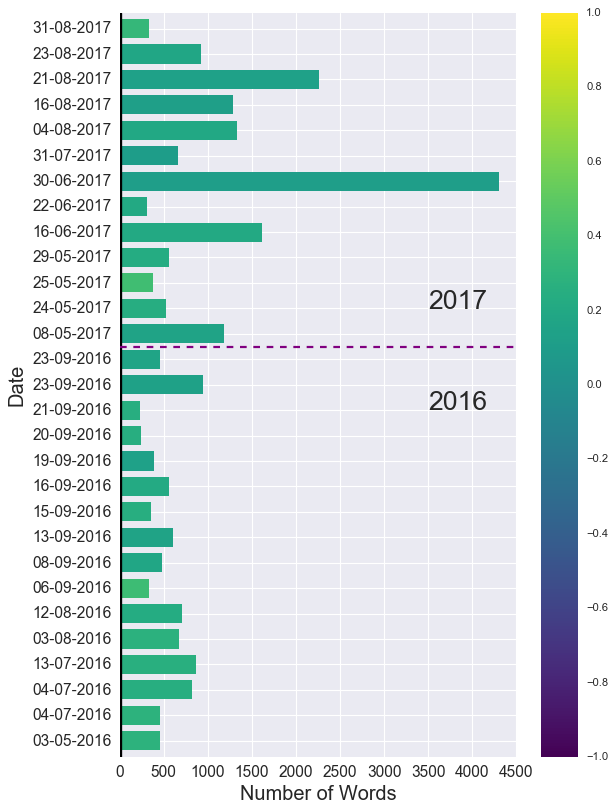

In [10]:
# Normalise colour range between -1 (negative sentiment) and 1 (positive sentiment).
norm_A = plt.Normalize(vmin=-1, vmax=1)
# Define name of file to save figure as.
pdf_name_A = 'pos-sent-plot.pdf'
# Call senti_plot function.
senti_plots( df_blogs, norm_A, pdf_name_A)

For Fig. B, I modify the code to normalise the colour range between the minimum sentiment value and maximum sentiment value ([min sentiment = 0.102, max sentiment = 0.386]) recorded for our dataset.

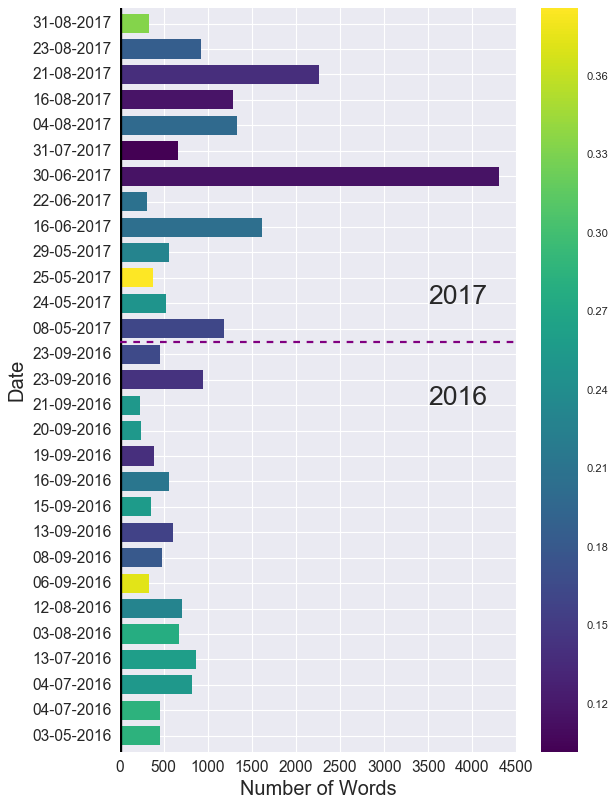

In [11]:
# Color scaled between [min sentiment = 0.102, max sentiment = 0.386].
norm_B = plt.Normalize(vmin=df_blogs['sentiment'].min(), vmax=df_blogs['sentiment'].max())
# Define name of file to save figure as.
pdf_name_B = 'norm-sent-plot.pdf'
# Call senti_plot function.
senti_plots( df_blogs, norm_B, pdf_name_B)

In [12]:
print(df_blogs['sentiment'].max(), df_blogs['sentiment'].min())

0.386274509804 0.101980706076


Fig. A provides a means of comparing the sentiment of the posts against the entire range of values that are possible. In the case of TextBlob:
- A value of 0 indicates a post is neutral in sentiment.
- Values that extend from 0 to -1 represent increasingly negative degrees of sentiment.
- While values that extend from 0 to +1 representing increasingly positive degrees of sentiment.

In Fig. A, all blogs appear green to light green in colour, reflecting that all posts are positive in sentiment and that this positivity has carried through from 2016 into 2017. In other words, it's a nice visual representation of the enthusiasm shared by bloggers for Data Science and the DatSci Awards.

To get a better idea of how sentiment varies just within the corpus itself, I then replotted the same figure but with colour values normalised between the minimum sentiment (0.102) and maximum sentiment (0.386) recorded for our dataset. In this case, two posts stand out, both appearing bright yellow in colour. We'll come back to these later to find out what the authors were talking about. 

Another result that stands out from the figures is that there is one post 4 times larger than the rest. To find the average word count of each post I used  ``pandas.DataFrame.describe``:

> Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

by executing ``df_blogs.describe()`` to produce the table in Fig. C.

In [13]:
# Fig. C in blog post.
df_blogs.describe()

,word_count,sentiment
count,29.000000,29.000000
mean,838.068966,0.219443
std,808.017589,0.073441
min,232.000000,0.101981
25%,387.000000,0.162095
50%,563.000000,0.213279
75%,927.000000,0.257323
max,4304.000000,0.386275


- **Count** gives the number of blog posts that are currently available on the DatSci Awards website. Hence, it is the same, 29, for both the ``word_count`` and ``sentiment`` columns.
- The **mean** ``word_count`` is 838 words, while the **max** is 4304, which is in fact not 4, but over 5 times larger than the average post.
- While the **min** ``sentiment`` of 0.102 is indeed within the positive range of values.

Fig. D depicts the number of blog posts that are published per month. We can see that the DatSci Blog was active between the months of May and September last year. This coincides with the DatSci Awards season, from the announcement of submission deadlines, right up until the awards ceremony itself held in September. In fact, the last two blog posts of 2016 occur the day after the awards ceremony held on the 22nd September 2016.

The next post appears at the start of May 2017, denoting the start of the new DatSci Awards season. So, even if you have no idea what the data is representing, we can see that whatever it is is seasonal. So far, 2017 has had 13 blog submissions, 7 more than for the same time period last year. Given the trend, I think it's likely that 2017 will have a higher number of posts than 2016, but will it also beat the highest number of submissions in a month currently held by September 2016 with 10 posts? I guess we'll have to check back in 30 days time to find out.

In [14]:
from datetime import datetime

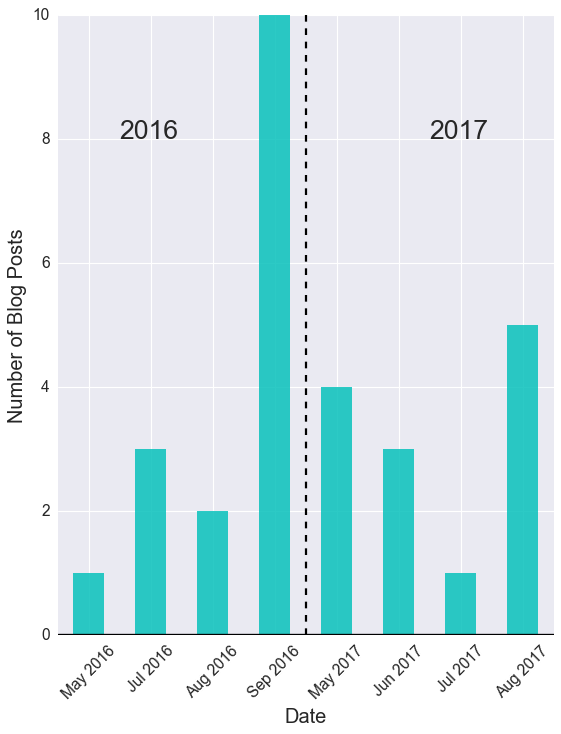

In [15]:
def month_hist( df, filename ):
    """
    Function to plot the number of blog posts that occurred each month.
    """
    # Initate figure and set size.
    fig = plt.figure(figsize=(8,10))
    
    # Sort df by date.
    df.sort_values('date', ascending=True, inplace=True)
    
    # Group by year and then group by month. Then count the results and plot as a barchart.
    ax = df['date'].groupby([df["date"].dt.year, df["date"].dt.month]).count().plot(kind="bar", 
                                        color='#07C1BB',  alpha=0.85, linewidth=0, width=0.5)
                                                                                             
                                                                                             
                                                                                             
                                                                                                                                                                                                                                                       
    # Add x-axis line
    ax.axhline(linewidth=3, color='black')
    
    # Set the font size of x-axis and y-axis tick labels.
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    
    # Add x-axis and y-axis labels.
    ax.set_xlabel('Date', fontsize = 18)
    ax.set_ylabel('Number of Blog Posts', fontsize = 18)

    # Change the format of how the dates display.
    labels = [item.get_text()[1:-1] for item in ax.get_xticklabels()]
    labels = [datetime.strptime(item, '%Y, %m').strftime('%b %Y') for item in labels]
    ax.set_xticklabels(labels, rotation=45)
    
    # Add 2016 and 2017 text annotation.
    ax.annotate('2016', xy=(0.5,8), xytext=(0.5,8), fontsize = 24)
    ax.annotate('2017', xy=(5.5,8), xytext=(5.5,8), fontsize = 24)

    # Add dividing line between 2016 and 2017 posts.
    ax.axvline(x=3.5, color='black', linewidth=2, linestyle='--');
    
    # Save figure as pdf.
    fig.savefig(filename, bbox_inches='tight')
    
month_hist(df_blogs, 'month_count.pdf')

## What are DatSci Bloggers Writing about?

So far, we know:

- When DatSci bloggers like to post,
- How long their posts tend to be, and
- The sentiment of their posts.

But we still have no idea as to what they're actually writing about. As of right now, if you didn't know the source of the data, it could be anything from summer travel diaries to movie reviews (where all the movies so far have been good). Or even if you do know the source, posts could still be potentially irrelevant to the DatSci Awards themselves. To address this, I'm going to apply a method known as [Term Frequency-Inverse Document Frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) or TF-IDF for short:

> A numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

This will allow us to examine what words are most important for individual blog posts in comparison to the overall corpus, and hence, will give a sense of the different topics DatSci bloggers like to cover.

**Note 1:** A portion of the code I will use next is an adaption of Steven Loria's implementation which conveniently uses TextBlob, and who has written an informative blog post on the topic which can be found [here](http://stevenloria.com/finding-important-words-in-a-document-using-tf-idf/). Comments at the start of code cells will denote when content has been adapted from Loria's implementation.<br>
**Note 2:** For those familiar with [scikit-learn](http://scikit-learn.org/stable/index.html) you might prefer [``sklearn.feature_extraction.text.TfidfVectorizer``](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html){:target="_blank"}.

Before applying TF-IDF I'm going to further preprocessor the corpus by removing common words such as *the*, *and*, *I*, *my*, *is* etc. These words are known as [Stop Words](https://nlp.stanford.edu/IR-book/html/htmledition/dropping-common-terms-stop-words-1.html) and are usually removed as they generally provide little value when attempting to classify the content of a document. To do this, I will use the Python library [Natural Language Toolkit](http://www.nltk.org/) (NLTK) stopword list.

In [16]:
from nltk.corpus import stopwords

# Use English stop words from NLTK
stopwords = stopwords.words('english')
# Convert text content into tokens (each word is a seperate item in a list.)
df_blogs['text_content'] = df_blogs['text_content'].str.lower().str.replace('[^\w\s]','').str.split()
# Remove stop words from content and store in a new column: nsw_content. (no-stop-words_content)
df_blogs['nsw_content'] = df_blogs['text_content'].apply(lambda x: [word for word in x if word not in stopwords])
# Convert stop word free text content into a TextBlob oject ready for TF-IDF
df_blogs['blob_nsw_content'] = df_blogs['nsw_content'].str.join(' ').str.strip().apply(TextBlob)

The following functions are taken from Steven Loria's [blog post](http://stevenloria.com/finding-important-words-in-a-document-using-tf-idf/) will be used to compute the TF-IDF for each document.

In [17]:
# Adapted from http://stevenloria.com/finding-important-words-in-a-document-using-tf-idf/
import math

def tfidf(word, blob, bloblist):
    """
    Computes the TF-IDF score. It is simply the product of tf and idf.
    """
    # Computes "term frequency" which is the number of times a word 
    # appears in a document blob, normalized by dividing by the 
    # total number of words in blob.
    tf = blob.words.count(word) / len(blob.words)
    # Returns the number of documents containing "word".
    n_containing = sum(1 for blob in bloblist if word in blob.words)
    # Computes "inverse document frequency" which measures how 
    # common a word is among all documents in the corpus (bloblist).
    idf = math.log(len(bloblist) / (1 + n_containing))
    return tf * idf

The next code sample demonstrates how I apply the above functions to the corpus and store the top 3 most important terms in a dictionary, where the keys of the dictionary are the blog titles.

In [18]:
# Adapted from http://stevenloria.com/finding-important-words-in-a-document-using-tf-idf/

i = 0
tfidf_dict = {}
# Iterate over each blog post.
for index, row in df_blogs.iterrows():
    i += 1
    # Compute TF-IDF scores for all words within each blog post.
    scores = {word: tfidf(word, row['blob_nsw_content'], df_blogs['blob_nsw_content']) 
              for word in row['blob_nsw_content'].words}
    # Sort the terms so that more important terms are at the start.
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    # Concatenation list of strings in blog title column.
    title = (' ').join(row['title']).strip()
    # Save the top 3 terms for each blog as dictionary value where key is the title of the blog they are from.
    tfidf_dict[title] = [word[0] for word in sorted_words[:3]]

The TF-IDF dictionary is then converted into a DataFrame and merged, using the ``title`` column, to the original DataFrame.

In [19]:
# Concatenate sentence lists within blog titles.
df_blogs['title'] = df_blogs['title'].str.join('').str.strip()
# Store tf-idf dictionary created in the previous step into it's own Pandas DataFrame.
df_tfidf = pd.DataFrame(list(tfidf_dict.items()), columns=['title', 'tfidf_words'])
# Merge using title column the TF-IDF DataFrame with the original to create a new DataFrame.
df_mblogs = pd.merge(df_blogs, df_tfidf, on="title")
# Call the time sort function defined earlier.
df_time_sort(df_mblogs, 'date')

Finally, I adapted the previous sentiment plotting function such that the top three most important words for each post would appear over their respective bar in the sentiment chart. In particular, 

- I added ``alpha = 0.6`` so that colours would be lighter,
- A for loop for annotating each post with their respective TF-IDF terms, and 
- I changed Seaborn's style to remove the grey grid background so that text is more legible.

In [20]:
def senti_plot_terms( df, norm_range , filename ):
    """
    Function for plottting sentiment and word count figures.
    """
    # Initate figure and set size.
    fig = plt.figure(figsize=(8,12))

    # The range of colours that I'm going to use for my plot.
    cmap = cm.get_cmap('viridis')

    # Normalise colour range.
    norm = norm_range
    # Create scalar mappable of colour map.
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    # The actual bar plotting:
    ax = df['word_count'].plot(kind='barh', color=sm.to_rgba(df['sentiment']), alpha=0.6, linewidth=0, width=0.75)
    sm._A = []
    fig.colorbar(sm).outline.set_visible(False)

    # Add y-axis line
    ax.axvline(linewidth=3, color='black')

    # Set the font size of x-axis and y-axis tick labels.
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)

    # Add x-axis and y-axis labels.
    ax.set_ylabel('Date', fontsize = 18)
    ax.set_xlabel('Number of Words', fontsize = 18)

    # Add 2016 and 2017 text annotation.
    ax.annotate('2016', xy=(3500,13), xytext=(3500,13), fontsize = 24)
    ax.annotate('2017', xy=(3500,17), xytext=(3500,17), fontsize = 24)

    # Add dividing line between 2016 and 2017 posts.
    ax.axhline(y=15.5, color='purple', linewidth=2, linestyle='--')
    
    # Annotate tfidf terms onto each post.
    for val in range(len(df)):
        val_anno = val - 0.15
        ax.annotate((' | ').join(df['tfidf_words'].iloc[val]), xy=(100,val_anno), xytext=(100,val_anno), 
                    fontsize = 12, weight = 'bold')
    
    # Change Seaborn style to a white background so that text is more legible.
    sb.set_style("whitegrid", {'axes.grid' : False})
    # Remove grey spline edges that occur as a result of changing seaborn style.
    ax.set_frame_on(False);

    # Save figure as pdf.
    fig.savefig(filename, bbox_inches='tight')

Call the adapted sentiment term function as follows:

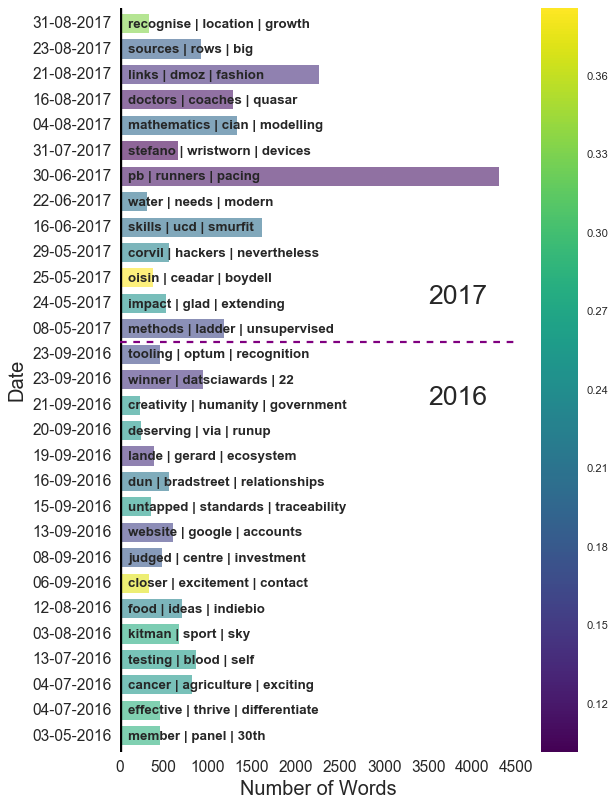

In [21]:
# Define name of file to save figure as.
pdf_name_C = 'norm-sent-plot-terms.pdf'
# Call senti_plot_terms function.
senti_plot_terms( df_mblogs, norm_B, pdf_name_C)

Immediately, our original sentiment figure becomes even more informative:

- The last post of 2016 is about who won: "winner - datsciawards - 22".
- The longest post has: "pb (personal best) - runner - pacing" which aligns with Barry Smyth's guest blog titled *Using AI to Run your Best Marathon.*
- We can now also see what the post with the highest positive sentiment is about: "oisin - ceadar - boydell". This is in fact a post by a previous winner, Oisin Boydell, describing what it is like to have won as a part of the CeADAR research team.
- Finally, another nice finding, especially as someone that will be attending the awards this year, is that the sentiment of the posts by Paul Hayes, DatSci Awards compère, increases from 2016 (15-09-2017) to 2017 (31-08-2017). Clearly, the DatSci Awards were a lot of fun last year, as even the compère can't hide their excitement for this years event!

### Topic Modelling

The very last type of text analysis I'm going to conduct is known as [Topic Modeling](http://www.kdnuggets.com/2016/07/text-mining-101-topic-modeling.html):

> Topic modeling can be described as a method for finding a group of words (i.e topic) from a collection of documents that best represents the information in the collection.

Hence, although TF-IDF has provided insight into what individual posts are about, topic modeling builds on TF-IDF to learn what topics are common across multiple posts. In addition, since there are two years of data available, we can also investigate whether these topics changed between 2016 and 2017. Therefore, for this task I'm going to use a method known as [Dynamic Topic Modeling via Non-negative Matrix Factorization](https://arxiv.org/abs/1607.03055), an approach developed by [Dr. Derek Greene](http://www.derekgreene.com/) from the [Insight Centre for Data Analytics](https://www.insight-centre.org/), who in the spirit of open science has made the [code](https://github.com/derekgreene/dynamic-nmf) freely available online.

First, I need to prepare the data so that it's in a suitable format for the library to work. To keep things simple I'm going to break the data into two different time windows, one for each year.

In [33]:
# Directory names
dir_16 = 'data/blogs/year2016/'
dir_17 = 'data/blogs/year2017/'

# Check if directories exist, if not, create.
import os
os.makedirs(dir_16, exist_ok=True)
os.makedirs(dir_17, exist_ok=True)

# Label files with uniques id numbers.
i = 1 # 2016
j = 1 # 2017

# Create new column in df where each row contains a concatenation of string lists in blog.
df_blogs['text_content'] = df_blogs['content'].str.join(' ').str.strip()

# Iterate over each row in dataframe and store each blog's content in it's own file.
for index, row in df_blogs.iterrows():
    if '2016' in str(row['date']):
        blog_file = open(dir_16+'2016_document_'+str(i)+'.txt', 'w')
        i += 1
    else:
        blog_file = open(dir_17+'2017_document_'+str(j)+'.txt', 'w')
        j += 1
    blog_file.write(row['text_content'])
    blog_file.close()

Now I can start to follow the steps outlined in the [ReadMe](https://github.com/derekgreene/dynamic-nmf) for the library.

**Step 1** Navigate to the directory `dynamic-nmf-master` and execute the following:

In [345]:
# First, for the notebook, I'm going to nav to inside the script directory.
filepath='./dynamic-nmf-master' 
os.chdir(filepath)

Otherwise, just navigate to the ``dynamic-nmf-master`` directory in your terminal and run the following script, with ``python`` instead of ``%run`` at the beginning.

In [ ]:
%run prep-text.py data/blogs/year2016 data/blogs/year2017 -o data --tfidf --norm

**Step 2** I'm going to set k=2 so that the algorithm looks for 2 topics:

In [ ]:
%run find-window-topics.py data/*.pkl -k 1 -o out

**Step 3** Finally, to view the results (see Fig. F and Fig. G) run:

In [ ]:
%run display-topics.py out/year2016_windowtopics_k01.pkl out/year2017_windowtopics_k01.pkl

As this is the last part of the code implemented for the accompanying post, the remainding data analysis can be found [here](https://graysons.github.io/datsci2017/)